In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy import integrate

%matplotlib inline


#définition des constantes nécessaires
pi = constants.pi #pi
r_e = 2.8179403262e-13 #rayon classique de l'électron en cm
m_e = constants.physical_constants["electron mass energy equivalent in MeV"][0] #Masse de l'électron en MeV (Le c^2 est inclu dans la valeur de la masse)
m_p = constants.physical_constants["proton mass energy equivalent in MeV"][0] #Masse du proton en MeV (Le c^2 est inclu dans la valeur de la masse)
rho_eau = 1 #densité de l'eau (de PSTAR) en g/cm^3
rho_os = 1.85 #densité de l'os cortical (de PSTAR) en g/cm^3
I_eau = 0.000075 #énergie moyenne d'excitation de l'eau (de PSTAR) en MeV
I_os = 0.0001064 #énergie moyenne d'excitation de l'os cortical (de PSTAR) en MeV

## Question 1

Selon la recherche, la gamme d'énergie cinétique des protons en protonthérapie varie entre 70 MeV et 250 MeV. La plus grande énergie utilisée est 250 MeV. Pour exprimer $\gamma (\beta)$ et $\gamma (T)$, nous devons faire de l'algèbre simple avec les équations de la dynamique des particules:

$$
\begin{align*}
    T &= (\gamma - 1)m_pc^2 \\ 
    \gamma(T) &= \frac{T}{m_pc^2} + 1
\end{align*}
$$
Où $m_p$ sera la masse du proton puisque c'est la vitesse des protons que l'on étudiera en protonthérapie.

Pour $\gamma (\beta)$, nous savons que $\beta \equiv \frac{v}{c}$;
$$\gamma = \sqrt{\frac{1}{1 - \beta^2}}$$

De plus, on en déduit que:
$$
\begin{align*}
    \beta = \sqrt{1-\frac{1}{\gamma^2}}
\end{align*}
$$


## Question 2

Par définition, on sait que la densité électronique est définie par le nombre d'électrons par gramme divisé par le volume:
$$
\begin{align*}
    n_e &= \frac{N}{V}
\end{align*}
$$
On peut développer le tout par les définitions usuelles.
$$
\begin{align*}
    n_e &= \frac{N}{V} = \frac{Z N_{atomes}}{\frac{m_{atomes}}{\rho}} = \frac{Z N_{atomes}\rho}{m_{atomes}}
\end{align*}
$$



5.8077993123458934e+23
3.342838276571907e+23


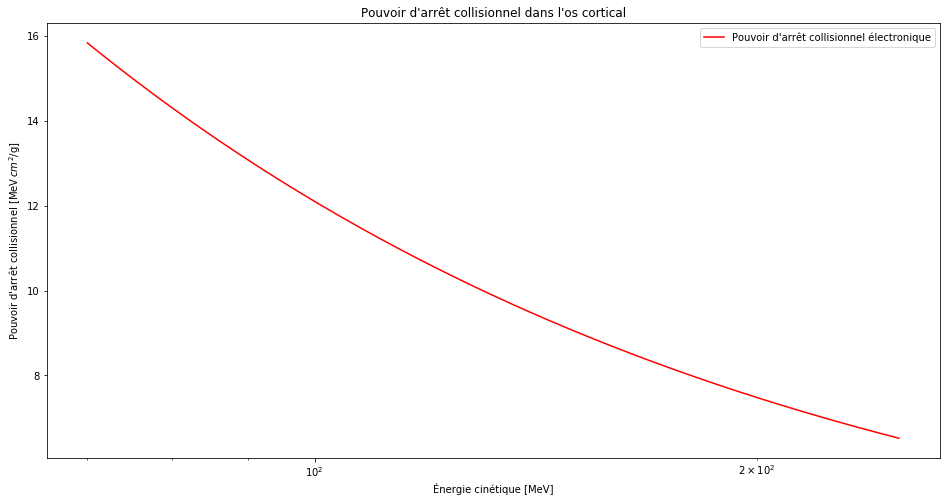

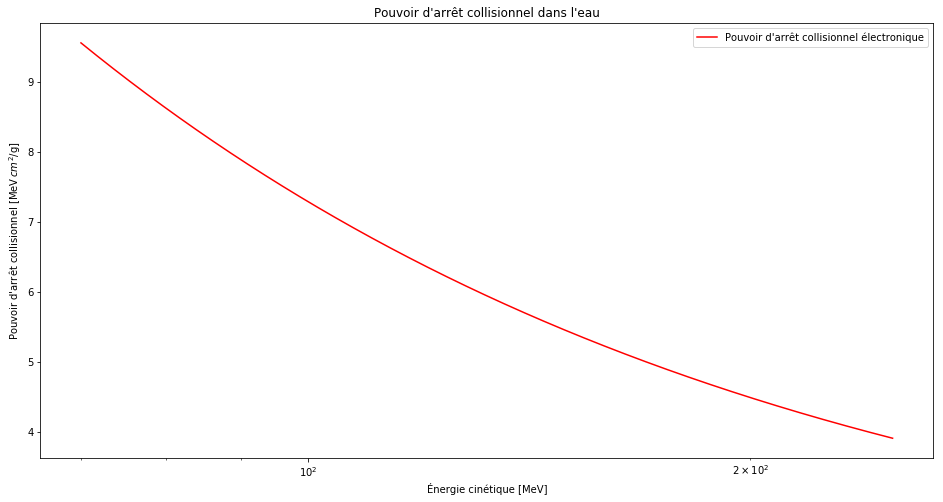

In [2]:
#La classe Milieu accepte comme arguments la densité volumique (rho), la fraction de chaque éléments du milieu en ordre,
#le numéro atomique (Z) dans le même ordre, et la masse molaire (mmol) aussi en ordre. 
class Milieu:
    def __init__(self, rho, frac = [], Z = [], mmol = []):
        self.rho = rho
        self.frac = frac
        self.Z = Z
        self.mmol = mmol

#La fonction edensite donne la densité électronique du milieu.
    def edensite(self):
        n = 0
        for i in range(0, len(self.mmol)):
            n += (self.rho*self.frac[i]*self.Z[i]*(6.022*10**23))/self.mmol[i]
        return n
        
        
frac_os = [0.047234, 0.144330, 0.041990, 0.446096, 0.002200, 0.104970, 0.003150, 0.209930, 0.000100]
Z_os = [1,6,7,8,12,15,16,20,30]
mmol_os = [1.00784, 12.0107, 14.0067, 15.999, 24.305, 30.9738, 32.065, 40.078, 65.38]

os = Milieu(rho_os, frac = frac_os, Z=Z_os, mmol = mmol_os)
eau = Milieu(rho_eau, frac = [0.111894, 0.888106], Z = [1,8], mmol = [1.00784 ,15.999])

ne_os = os.edensite()
ne_eau = eau.edensite()
print(ne_os)
print(ne_eau)

def gamma(T):
    return (T/m_p) + 1

def beta(T):
    return np.sqrt(1-(1/(gamma(T)**2)))

def Te_max(T):
    return 2*m_e*((gamma(T)**2) - 1)/(1 + 2*(gamma(T))*(m_e/m_p) + (m_e/m_p)**2)

def S_col(T, I, n_e):
    return 2*pi*r_e**2*m_e*n_e*(1/beta(T)**2)*(np.log( (2*m_e*beta(T)**2*gamma(T)**2*Te_max(T))/(I)**2 )-2*beta(T)**2)

def plot(n_e, I, titre):
    x = np.linspace(70,250,3000)
    plt.figure(figsize=(16,8))
    plt.plot(x, S_col(x, I, n_e), 'r-', label="Pouvoir d'arrêt collisionnel électronique")
    plt.xscale("log")
    plt.xlabel("Énergie cinétique [MeV]")
    plt.ylabel(r"Pouvoir d'arrêt collisionnel [MeV$\,cm^2$/g]")
    plt.legend()
    plt.title(titre)
    plt.show()

plot(ne_os, I_os, "Pouvoir d'arrêt collisionnel dans l'os cortical")
plot(ne_eau, I_eau, "Pouvoir d'arrêt collisionnel dans l'eau")

Nous constatons que le graphique de l'os cortical est semblable mais pas pareil au graphique de l'os cortical venant des tableaux de valeurs de PSTAR. La différence est simple, pour les données de PSTAR, S_col est divisé par la densité volumique de l'os (soit 1.85). Ainsi, les graphiques représentent la même chose, à une constante près.

## Question 3

On doit s'assurer de l'homogénéité dimensionnelle dans l'équation de la porté dans l'approximation CSDA:
$$\begin{align*}
    R_{CSDA} &= \int_0^{T_i} \frac{\text{d}T'}{\frac{S_{col}}{\rho}}\\
    R_{CSDA}\left[ \text{g}/\text{cm}^2 \right] &= \int_0^{T_i} \frac{\text{d}T'\left[ \text{MeV} \right]}{\frac{S_{col}}{\rho}\left[\text{MeV}/\text{g}/\text{cm}^2\right]}\\
    R_{CSDA}\left[ \text{g}/\text{cm}^2 \right] &= \int_0^{T_i} \frac{\text{d}T'}{\frac{S_{col}}{\rho}}\left[\text{g}/\text{cm}^2 \right]\\
\end{align*}
$$

Qui est bien ce qu'on devait vérifier.

## Question 4

Dans notre cas, puisqu'on étudie le pouvoir d'arrêt collisionnel d'un proton qui est ralenti par les électrons dans de la matière, on sait que l'on étudie le pouvoir d'arrêt collisionnel électronique.

On peut donc récupérer les données du PSTAR pour le pouvoir d'arrêt collisionel du proton dans l'eau liquide puis dans l'os cortical, et comparer, dans chacun, le pouvoir d'arrêt collisionel électronique avec le pouvoir d'arrêt total sur une plage de 70 à 250 MeV.

On comparera le tout graphiquement avec matplotlib.

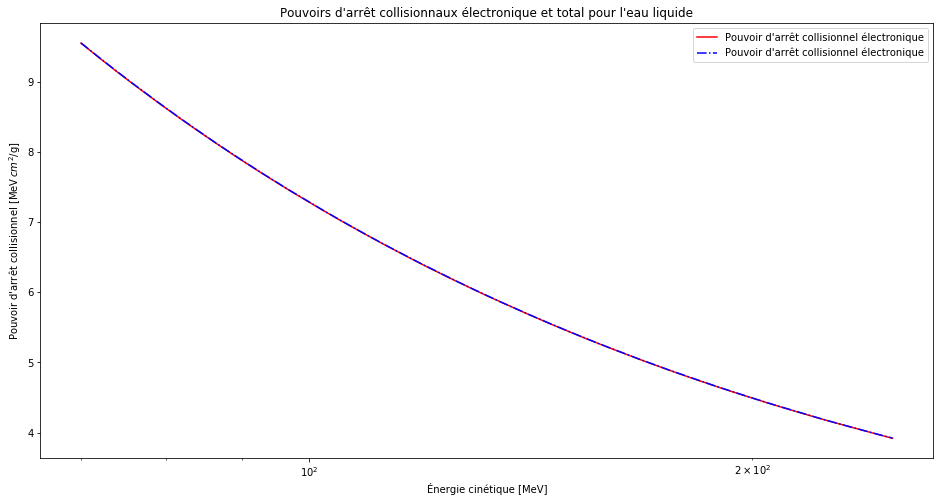

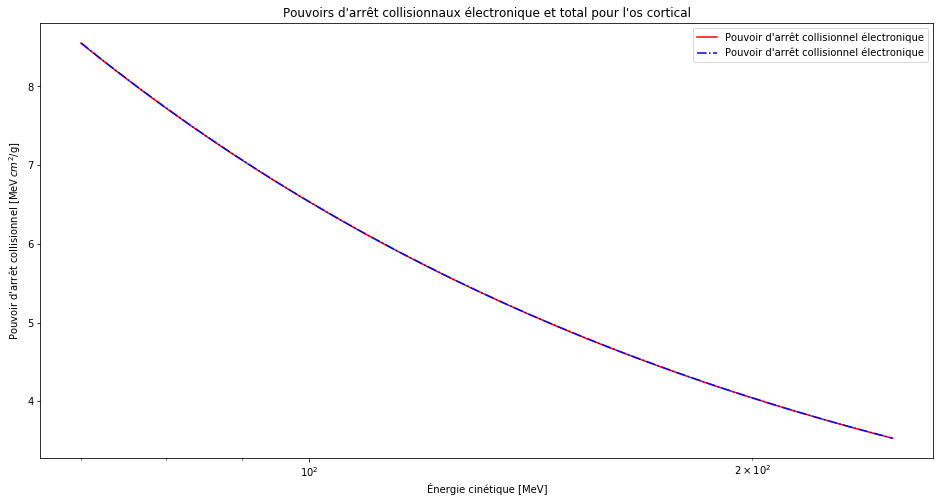

In [22]:
def plot_S_col_PSTAR(nom_de_fichier, titre):
    fichier = np.genfromtxt(nom_de_fichier, skip_header=8, skip_footer=1)
    plt.figure(figsize=(16,8))
    plt.plot(fichier[:,0], fichier[:, 1], 'r-', label="Pouvoir d'arrêt collisionnel électronique")
    plt.plot(fichier[:,0], fichier[:, 2], 'b-.', label="Pouvoir d'arrêt collisionnel électronique")
    plt.xlabel("Énergie cinétique [MeV]")
    plt.ylabel(r"Pouvoir d'arrêt collisionnel [MeV$\,cm^2$/g]")
    plt.xscale("log")
    plt.legend()
    plt.title(titre)
    plt.show()
    
plot_S_col_PSTAR("S_col_PSTAR_70-250_eau.txt", "Pouvoirs d'arrêt collisionnaux électronique et total pour l'eau liquide")
plot_S_col_PSTAR("S_col_PSTAR_70-250_os.txt", "Pouvoirs d'arrêt collisionnaux électronique et total pour l'os cortical")

On voit très bien sur les deux graphiques que le pouvoir d'arrêt collisionnel total est très bien approximé par le pouvoir d'arrêt collisionnel électronique dans la plage d'énergie clinique.

## Question 5

Il suffit d'insérer l'intégrale dans Wolfram Alpha pour voir que celle-ci n'est pas analytique. Il est donc nécessaire d'utiliser une méthode numérique puisqu'il n'y a pas d'autres moyens d'obtenir un résultat. On voit en effet que l'intégrale d'une équation de la forme $\frac{1}{\ln\left(x\right)+\text{constante}}$, n'est pas analytique.

## Question 6

La méthode des trapèzes calculera l'aire totale de $N$ trapèzes qui approximeront la portée des protons. L'agorithme adaptif inclus avec la fonction doublera le nombre de tranches à chaque itération. Le fait de doubler le nombre de tranches permettera de réutiliser le résultat précédemment puisque celui-ci sera contenu dans la moité des tranches. La boucle s'arrêtera lorsque la précision désirée sera atteinte.

In [4]:
def trapezes(f, a, b, N, precision):
    x = np.linspace(a,b,N+1) # N+1 parce que Python commence à indexer à 0
    y = f(x)
    y_droit = y[1:] # points droits du trapèze
    y_gauche = y[:-1] # points gauches du trapèze
    h = (b - a)/N # Largeur des tranches
    I = (h/2) * np.sum(y_droit + y_gauche) # Résultat
    precision_actuelle = np.inf # On met la précision la plus haute possible pour pouvoir la descendre
    while precision_actuelle >= precision:
        integrale_precedente = I
        N = 2*N # On double le nombre de tranches
        h = (b - a)/N
        x = np.linspace(a, b, N+1)[1::2] # On prend seulement les nombres impaires pour ne pas réévaluer le résultat précédent
        I = I/2 + h * np.sum(f(x))
        precision_actuelle = abs(integrale_precedente - I)/3
    return I, precision_actuelle, N # I: Résultat, precision_actuelle: Précision du résultat, N: Nombre de tranches

# Puisqu'on veut la portée en cm, on doit rediviser par rho
R_eau = lambda x: 1/S_col(x, I_eau, ne_eau) # on redéfinit les fonctions S_col multivariées comme des fonctions à une variable
R_os = lambda x: 1/S_col(x, I_os, ne_os)

Après avoir redéfini les fonctions en fonctions à une variable. On pourra obtenir le résultat de la fonction trapèzes. 

In [5]:
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau: ", trapezes(R_eau,3,100, 10, 1e-9))
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical: ", trapezes(R_os,3,100, 10, 1e-9))

Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau:  (7.696317638438946, 5.295482570962425e-10, 40960)
Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical:  (4.652988169790625, 3.2785981337231834e-10, 40960)


## Question 7

On commence par faire les définitions:
$$\begin{align*}
    a &= 2m_e & b &= 1 + \left( \frac{m_e}{m_p} \right)^2 & 
    d &= \frac{m_e}{m_p}
\end{align*}$$

Dans lesquelles on a changé le $c$ de l'énoncé pour ne pas le confondre avec la vitesse de la lumière qui est aussi utilisée plus haut dans l'énoncé. Dans tout le travail on considère les constantes $m_e$ et $m_p$ comme leur équivalent en MeV. Ainsi, on n'écrira aucun des $c^2$ qui sont normalement inclus avec celles-ci. On peut donc définir:

$$\begin{align*}
    T_e^{max} &= \frac{a\left( \gamma^2 -1\right)}{b+d\gamma}
\end{align*}$$

Et finalement:

$$\begin{align*}
    U &= 2\pi r_e^2 m_e n_e & k &= \frac{a^2}{I^2}
\end{align*}$$
Notre fonction $S_{col}$ devient donc:
$$\begin{align*}
    S_{col} &= \frac{U \left(\ln \left[\frac{\beta ^2 \gamma ^2 \left(\gamma ^2-1\right) k}{b+d \gamma }\right]-2 \beta
   ^2\right)}{\beta ^2}\\
   &= \frac{U \left(\ln {\left[\frac{\left(1-\frac{1}{\gamma ^2}\right) \gamma ^2 \left(\gamma ^2-1\right) k}{b+d
   \gamma }\right]}-2 \left(1-\frac{1}{\gamma ^2}\right)\right)}{1-\frac{1}{\gamma ^2}}\\
   &= \frac{U \left(\gamma ^2 \ln \left[\frac{\left(\gamma ^2-1\right)^2 k}{b+d \gamma }\right]-2 \gamma
   ^2+2\right)}{\gamma ^2-1}
\end{align*}$$

Il sera plus simple d'évaluer premièrement la dérivée par rapport à gamma et ensuite trouver la dérivée de $S_{col}$ par rapport à $T$ avec:

$$\begin{align*}
    \frac{\text{d}S_{col}}{\text{d} T} &= \frac{\text{d}S_{col}}{\text{d}\gamma} \frac{\text{d}\gamma}{\text{d}T}
\end{align*}$$
Après une quantité incroyable de dérivations de produits, on obtient:

$$
\begin{align*}
    \frac{\text{d}S_{col}}{\text{d}\gamma} &= \frac{U \left(\frac{\gamma^2 (\gamma d+b) \left(\frac{4 \gamma
   \left(\gamma^2-1\right) a k}{\gamma d+b}-\frac{\left(\gamma^2-1\right)^2 a d
   k}{(\gamma d+b)^2}\right)}{\left(\gamma^2-1\right)^2 a k}+2 \gamma \ln
   \left[\frac{\left(\gamma^2-1\right)^2 a k}{\gamma d+b}\right]-4
   \gamma\right)}{\gamma^2-1}-\frac{2 \gamma U \left(\gamma^2 \ln
   \left[\frac{\left(\gamma^2-1\right)^2 a k}{\gamma d+b}\right]-2
   \gamma^2+2\right)}{\left(\gamma^2-1\right)^2}\\
   &= \frac{\gamma  U \left(\gamma  \left(4 b \gamma +3 d \gamma ^2+d\right)-2 (b+d \gamma ) \ln \left[\frac{a
   \left(\gamma ^2-1\right)^2 k}{b+d \gamma }\right]\right)}{\left(\gamma ^2-1\right)^2 (b+d \gamma )}
\end{align*}
$$
Il suffira de multiplier le tout par:
$$
\begin{align*}
    \frac{\text{d}\gamma}{\text{d}T} &= \frac{\text{d}\left(\frac{T}{m_pc^2} + 1 \right)}{\text{d}T}\\
    &= \frac{1}{m_p c^2}
\end{align*}
$$
Puisque notre valeur de $m_p$ est en MeV, on a:
$$
\begin{align*}
    \frac{\text{d}\gamma}{\text{d}T} &= \frac{1}{m_p}
\end{align*}
$$
On a donc que la dérivée de $S_{col}$ est:
$$
\begin{align}
   \frac{\text{d}S_{col}}{\text{d}T} &= \frac{\gamma  U \left(\gamma  \left(4 b \gamma +3 d \gamma ^2+d\right)-2 (b+d \gamma ) \ln \left[\frac{a
   \left(\gamma ^2-1\right)^2 k}{b+d \gamma }\right]\right)}{m_p\left(\gamma ^2-1\right)^2 (b+d \gamma )}
\end{align}
$$

Sous forme _Python_, on aura:

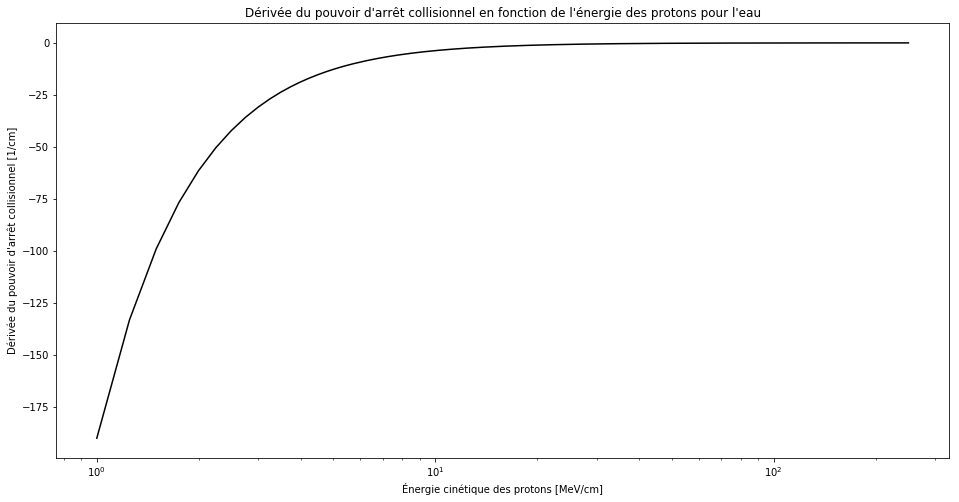

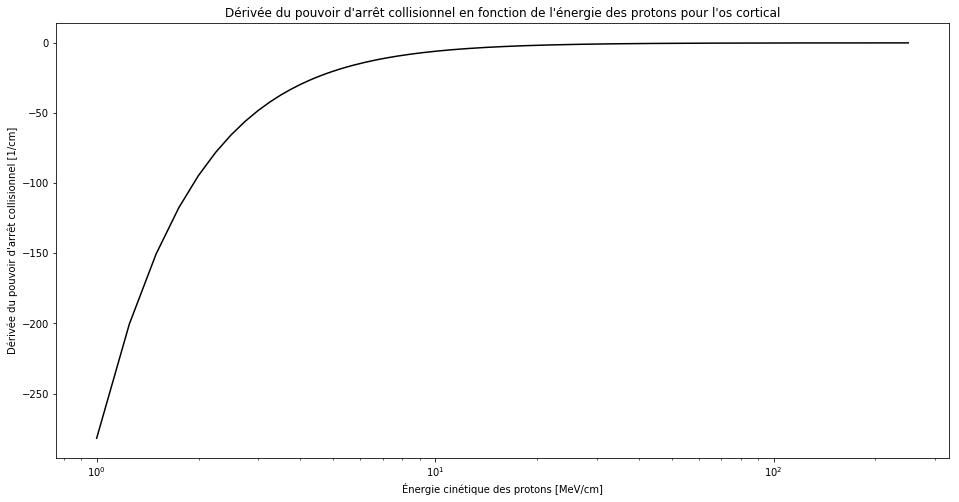

In [6]:
def d_S_col(T, I, n_e):
    a = 2*m_e
    b = 1 + (m_e/m_p)**2
    d = m_e/m_p
    U = 2*pi*r_e**2*m_e*n_e
    k = a**2/I**2
    return (gamma(T)*U*(gamma(T)*(4*b*gamma(T)+3*d*gamma(T)**2+d)-2*(b+d*gamma(T))*np.log((a*(gamma(T)**2-1)**2*k)/(b+d*gamma(T))) ))/(m_p*((gamma(T))**2-1)**2*(b+d*gamma(T)))

linspace = np.linspace(1, 250, 1000)

plt.figure(figsize=(16,8))
plt.xscale("log")
plt.xlabel("Énergie cinétique des protons [MeV/cm]")
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel [1/cm]")
plt.title("Dérivée du pouvoir d'arrêt collisionnel en fonction de l'énergie des protons pour l'eau")
plt.plot(linspace, d_S_col(linspace, I_eau, ne_eau), "k-")

plt.figure(figsize=(16,8))
plt.xscale("log")
plt.xlabel("Énergie cinétique des protons [MeV/cm]")
plt.ylabel("Dérivée du pouvoir d'arrêt collisionnel [1/cm]")
plt.title("Dérivée du pouvoir d'arrêt collisionnel en fonction de l'énergie des protons pour l'os cortical")
plt.plot(linspace, d_S_col(linspace, I_os, ne_os,), "k-")
plt.show()

## Question 8

Avec le premier terme de la formule d'Euler-Maclaurin, on sait que l'erreur sur l'intégrale des trapèzes sera:
$$
\begin{align*}
    \epsilon &= \frac{1}{12}h^2 \left| f'(a) - f'(b) \right|
\end{align*}
$$
Puisqu'on avait comme résultat, erreur et nombre de tranches:

In [7]:
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau: ", trapezes(R_eau,3,100, 10, 5e-9)) #Où on a mis 5e-9 pour la précision puisque ça nous donne une précision de 1e-9
print("Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical: ",trapezes(R_os,3,100, 10, 5e-9))

Résultat obtenu à l'aide de la méthode des trapèzes pour l'eau:  (7.696317636850301, 2.1181924362660234e-09, 20480)
Résultat obtenu à l'aide de la méthode des trapèzes pour l'os cortical:  (4.652988168807045, 1.3114389574298002e-09, 20480)


On a comme valeurs:

$$
\begin{align*}
    a &= 3\,\text{MeV} & b &= 100\,\text{MeV} & N &= 20480
\end{align*}
$$

Par contre, c'est la dérivée de $\frac{1}{S_{col}}$ que l'on veut pour l'erreur sur $R_{CSDA}$. On pourra la trouver facilement avec la dérivée d'un quotient:
$$
\begin{align*}
    \frac{\text{d}}{\text{d}\gamma}\left(\frac{1}{S_{col}}\right) &= \frac{S'_{col}}{S_{col}^2}\\
    &= -\frac{\gamma  U\left(\gamma \left(4 b \gamma +3 \gamma ^2 d+d\right)-2 (b+\gamma  d) \ln
   \left(\frac{a \left(\gamma ^2-1\right)^2 k}{b+\gamma  d}\right)\right)}{m_p (b+\gamma  d)
   U\left(\gamma ^2 \ln \left(\frac{a \left(\gamma ^2-1\right)^2 k}{b+\gamma  d}\right)-2
   \gamma ^2+2\right)^2}
\end{align*}
$$

Ainsi, on pourra trouver:

In [8]:
def d_R_CSDA(T, I, n_e): # Traduction en Python de l'expression de la dérivée de S_col
    a = 2*m_e
    b = 1 + (m_e/m_p)**2
    d = m_e/m_p
    U = 2*pi*r_e**2*m_e*n_e
    k = a**2/I**2
    return (gamma(T)*U*(gamma(T)*(4*b*gamma(T)+3*(gamma(T))**2*d+d)-2*(b+gamma(T)*d)*np.log((a*k*((gamma(T))**2-1)**2)/(b+gamma(T)*d))))/(m_p*U*(b+gamma(T)*d)*((gamma(T))**2*np.log((a*k*((gamma(T))**2-1)**2)/(b+gamma(T)*d))-2*(gamma(T))**2+2)**2)

def err_trapezes(derivee, a, b, N):
    h = (b-a)/N
    return (1/12)*h**2*np.abs(derivee(a)-derivee(b))

d_S_col_eau = lambda x: d_R_CSDA(x, I_eau, ne_eau) # on redéfinit les fonctions d_S_col multivariées comme des fonctions à une variable
d_S_col_os = lambda x: d_R_CSDA(x, I_os, ne_os)

print("Erreur sur la méthode des trapèzes pour l'eau: ", err_trapezes(d_S_col_eau, 3, 100, 20480))
print("Erreur sur la méthode des trapèzes pour l'os cortical: ", err_trapezes(d_S_col_os, 3, 100, 20480))

Erreur sur la méthode des trapèzes pour l'eau:  1.8011575033233463e-10
Erreur sur la méthode des trapèzes pour l'os cortical:  1.937329065089963e-10


On voit que ces erreurs sont équivalentes, et même plus faibles que celles calculées par l'algorithme adaptatif.

## Question 9

On implémente ici le code _Python_ de Mark Newman pour calculer les poids nécessaire aux calculx d'intégrales numériques. Celui-ci trouve les zéros des polynômes de Legendre de degré $N$ pour trouver les poids et les positions sur le domaine de $-1$ à $1$ de $N$ points d'échantillonage. On doit ensuite ajuster le domaine auparavant de $-1$ à $1$ pour l'ajuster au domaine d'intégration.

Le calcul des poids est l'opération la plus coûteuse, alors que l'ajustement du domaine est une opération qui ne demande pas beaucoup de temps d'opération. Mais si on garde le même $N$ pour les $10 000$ calculs, il faudra seulement réajuster le domaine à chaque proton et ainsi avoir une méthode d'intégration très rapide sans perdre de précision.

In [9]:
from numpy import ones,copy,cos,tan,pi,linspace

# Programme de Mark Newman
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w #Ajustement du domaine

def testN(N):
    x_i, w_i = gaussxwab(N, 3, 240)
    n=0
    n = sum(w_i*R_eau(x_i))
    return n

print(testN(1000))
print(testN(1))
print(testN(10))
print(testN(20))
print(testN(30))
print(testN(37))

35.39041494301123
37.49769893589867
35.39048025688255
35.39041513292285
35.39041494396998
35.390414943037975


La fonction testN prend le nombre N que nous voulons et redonne une valeur pour un domaine d'intégration entre 3 et 240. La valeur de référence est la première (soit 35.39041494301123), car nous avons N=1000. Évidemment, pour sauver du temps, nous recalculons avec différents N pour trouver le meilleur compromis entre précision et vitesse d'exécution. À N=37, la valeur est (par rapport à notre valeur de référence) à une incertitude d'environs 1e-10. Nous prendrons donc N=37. La justesse demandée était 1e-9, mais le résultat donné sera possiblement moins juste puisque le proton varie selon une incertitude $\sigma=3$ MeV. 

Pour l'implémentation de Newman de la quadrature gaussienne, nous utilisons $N=37$ ainsi qu'un domaine d'intégration de 3 à l'énergie de chaque proton. Nous utilisons donc la fonction gaussxw(N=37) et nous utilisons ces poids avec la fonction qui intègre le domaine de  chaque proton pour obtenir un histogramme de portée (voir histogramme suivant)

3.08 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.04 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
599 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


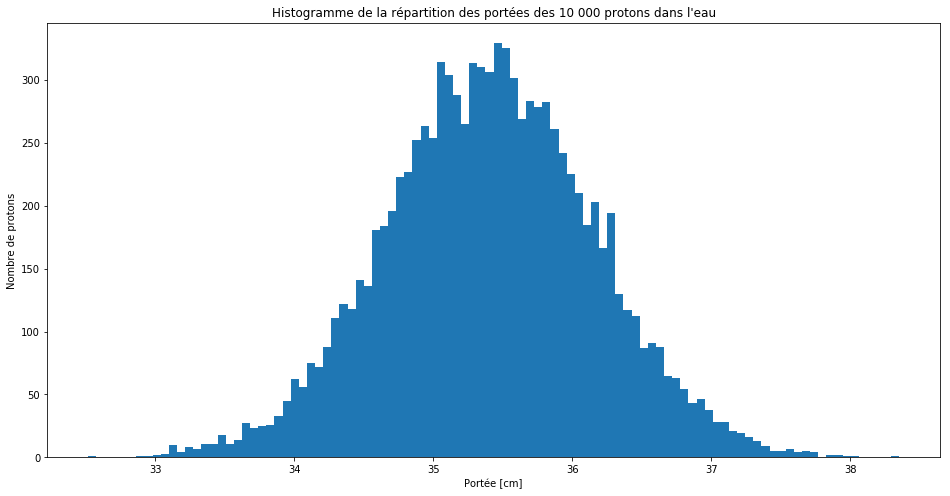

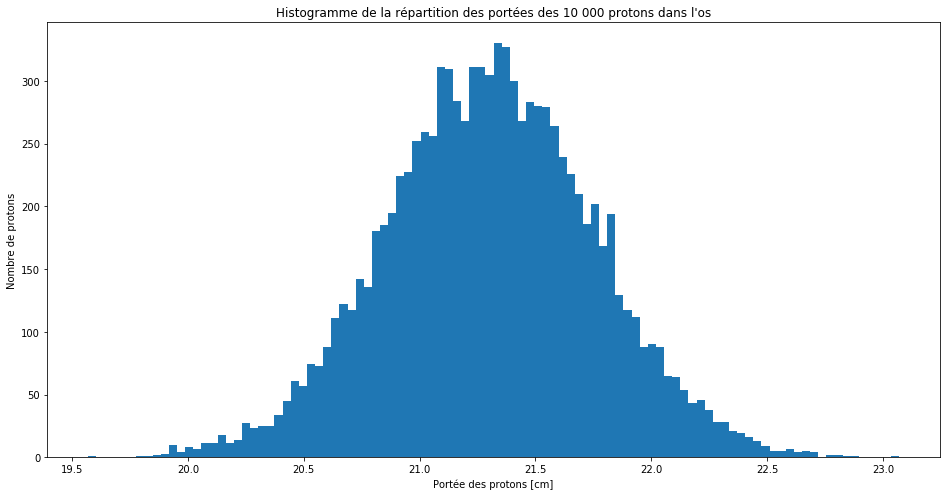

In [26]:
#fonction pour intégrer les 10000 protons:
protons = np.random.normal(240,3,10000)
%timeit -r1 -n1 x,w = gaussxw(37) # Mesure de temps pour trouver les poids : 4.21 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
x,w = gaussxw(37)
def int_protons(f, energies):
    x_i, w_i = 0.5*(energies-3)*x+0.5*(energies+3), 0.5*(energies-3)*w
    n=0
    I=sum(w_i*f(x_i))
    return I

gauss_hist_eau = lambda x: int_protons(R_eau, x)
gauss_hist_os = lambda x: int_protons(R_os, x)

# On assigne deux fois la fonction parce qu'un bug dans IPython nous empêche de définir la variable lorsque %timeit est appelé
%timeit -r1 -n1 Hist_protons_eau = list(map(gauss_hist_eau, protons)) # Mesure de temps du calcul pour l'eau : 701 ms ± 64.6 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)
Hist_gauss_eau = list(map(gauss_hist_eau, protons))

%timeit -r1 -n1 Hist_protons_os = list(map(gauss_hist_os, protons))# Mesure de temps du calcul pour l'eau : 678 ms ± 31.7 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)
Hist_gauss_os = list(map(gauss_hist_os, protons))

plt.figure(figsize=(16,8))
plt.hist(Hist_gauss_eau, 100)
plt.xlabel("Portée [cm]")
plt.ylabel("Nombre de protons")
plt.title("Histogramme de la répartition des portées des 10 000 protons dans l'eau")
plt.show()

plt.figure(figsize=(16,8))
plt.hist(Hist_gauss_os, 100)
plt.xlabel("Portée des protons [cm]")
plt.ylabel("Nombre de protons")
plt.title("Histogramme de la répartition des portées des 10 000 protons dans l'os")
plt.show()

L'implémentation de Newman de la quadrature de Gauss est extrêmement efficace puisqu'on calcule seulement une fois les poids. La méthode calcule environ 14 000 protons par seconde.

## Question 10

On utilise l'algorithme adaptatif pour trouver le nombre de tranches nécessaire pour atteindre la précision nécessaire à $240$ MeV:

In [16]:
print(trapezes(R_eau, 3, 240, 50, 5e-9))
print(trapezes(R_os, 3, 240, 50, 5e-9))

(35.39041494029174, 2.719467318001989e-09, 51200)
(21.29338251483977, 1.671724684608004e-09, 51200)


On utilisera le même code pour les trapèzes qu'au numéro 6, mais en coupant l'algorithme adaptatif et en fixant le nombre de tranches à $51 200$.

40.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
44.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


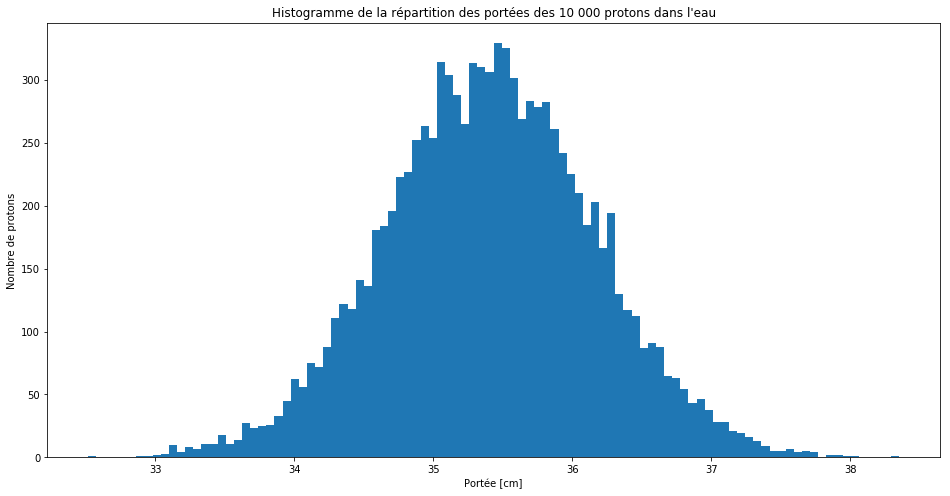

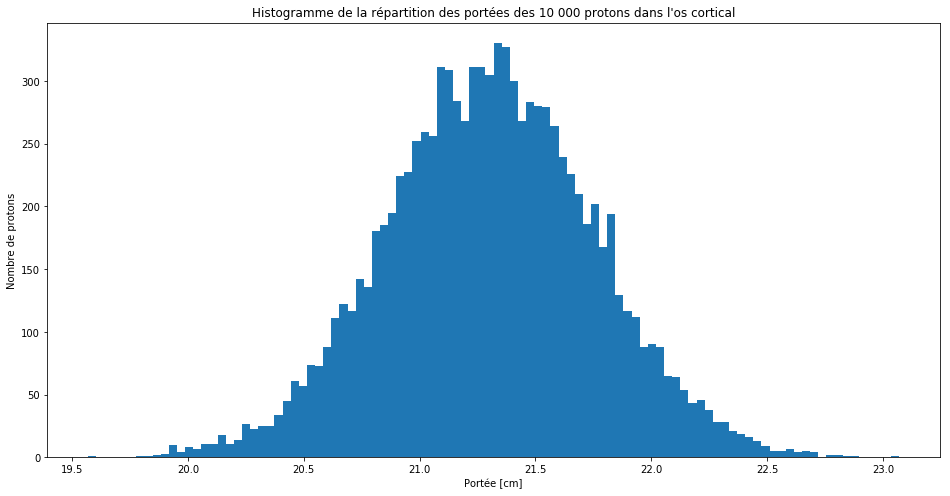

In [28]:
def trapezes_sans_adapt(f, a, b, N):
    x = np.linspace(a,b,N+1) # N+1 parce que Python commence à indexer à 0
    y = f(x)
    y_droit = y[1:] # points droits du trapèze
    y_gauche = y[:-1] # points gauches du trapèze
    h = (b - a)/N # Largeur des tranches
    I = (h/2) * np.sum(y_droit + y_gauche) # Résultat
    return I

trapezes_pour_hist_eau = lambda x: trapezes_sans_adapt(R_eau, 3, x, 51200)
trapezes_pour_hist_os = lambda x: trapezes_sans_adapt(R_os, 3, x, 51200)

%timeit -r1 -n1 R_CSDA_trapezes_eau = list(map(trapezes_pour_hist_eau, protons)) # 45 s ± 2.3 s per loop (mean ± std. dev. of 10 runs, 1 loop each)
R_CSDA_trapezes_eau = list(map(trapezes_pour_hist_eau, protons))

%timeit -r1 -n1 R_CSDA_trapezes_os = list(map(trapezes_pour_hist_os, protons)) # 47.4 s ± 1.4 s per loop (mean ± std. dev. of 10 runs, 1 loop each)
R_CSDA_trapezes_os = list(map(trapezes_pour_hist_os, protons))



plt.figure(figsize=(16,8))
plt.hist(R_CSDA_trapezes_eau, 100)
plt.xlabel("Portée [cm]")
plt.ylabel("Nombre de protons")
plt.title("Histogramme de la répartition des portées des 10 000 protons dans l'eau")


plt.figure(figsize=(16,8))
plt.hist(R_CSDA_trapezes_os, 100)
plt.xlabel("Portée [cm]")
plt.ylabel("Nombre de protons")
plt.title("Histogramme de la répartition des portées des 10 000 protons dans l'os cortical")

plt.show()

La méthode des trapèzes calcule environ 217 protons par seconde, puisque celle-ci nécessite en moyenne $46$ secondes.

## Question 11

On utilisera la fonction _integrate.quad_ de _scipy_. Nous n'avons pas beaucoup d'informations sur le fonctionnement de celle-ci, mais on peut deviner, avec le temps qu'elle prend pour obtenir un résultat, qu'elle recalcule les poids à chaque calcul.

13 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


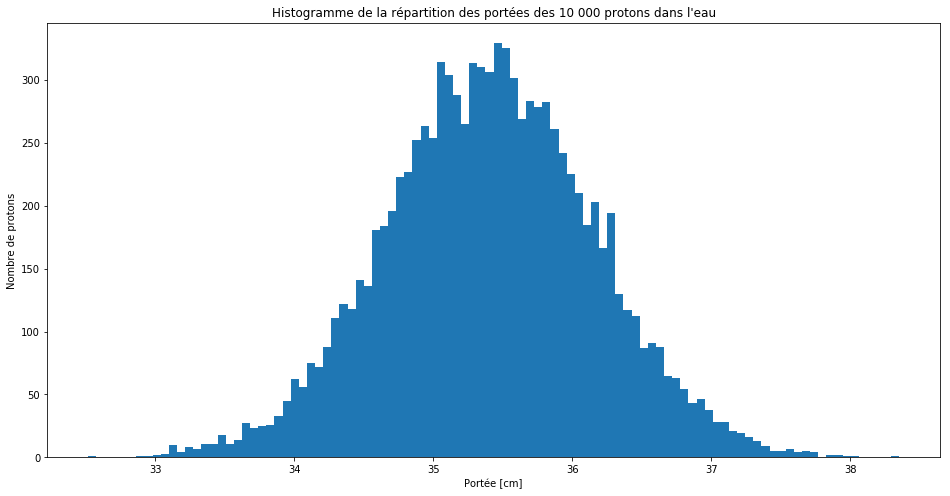

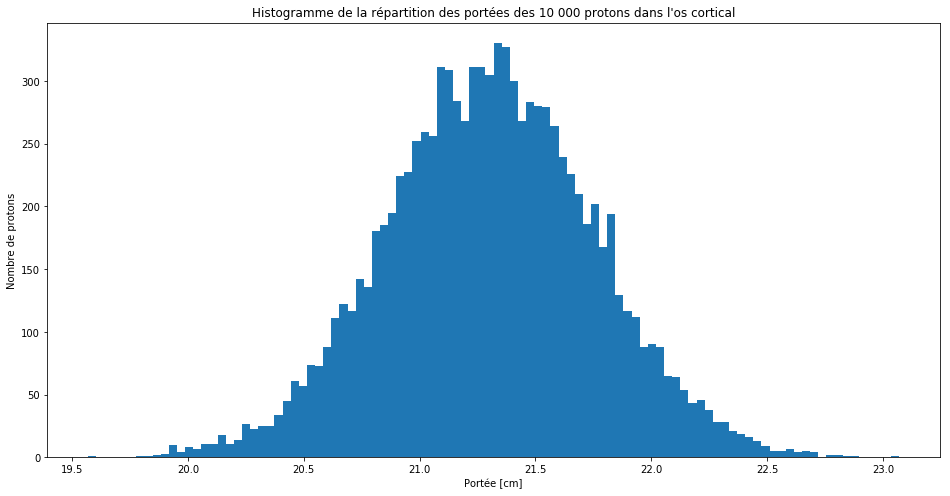

In [27]:
quad_pour_hist_eau = lambda x: integrate.quad(R_eau, 3, x, epsabs=1e-9)
quad_pour_hist_os = lambda x: integrate.quad(R_os, 3, x, epsabs=1e-9)

%timeit -r1 -n1 R_CSDA_quad_eau = list(zip(*list(map(quad_pour_hist_eau, protons))))[0] # 13.4 s ± 553 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
R_CSDA_quad_eau = list(zip(*list(map(quad_pour_hist_eau, protons))))[0] # scipy.integrate.quad retourne un tuple contenant le résultat et l'erreur.
# On doit donc séparer les tuples de la liste avec zip(*) et recréer une liste

%timeit -r1 -n1 R_CSDA_quad_os = list(zip(*list(map(quad_pour_hist_os, protons))))[0] # 13.8 s ± 586 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
R_CSDA_quad_os = list(zip(*list(map(quad_pour_hist_os, protons))))[0]

plt.figure(figsize=(16,8))
plt.hist(R_CSDA_quad_eau, 100)
plt.xlabel("Portée [cm]")
plt.ylabel("Nombre de protons")
plt.title("Histogramme de la répartition des portées des 10 000 protons dans l'eau")

plt.figure(figsize=(16,8))
plt.hist(R_CSDA_quad_os, 100)
plt.xlabel("Portée [cm]")
plt.ylabel("Nombre de protons")
plt.title("Histogramme de la répartition des portées des 10 000 protons dans l'os cortical")

plt.show()

La fonction _integrate.quad_ de _scipy_ évalue environ 735 protons par seconde.

## Question 12

Un algorithme pour faire les calculs par GPU pourrait améliorer grandement la rapidité et ne pas perdre de précision puisqu'il serait possible de faire plusieurs des 10 000 calculs simultanément.

Sinon, on peut remarquer que l'on recalcule plusieurs l'énergie pour des protons de même énergie ou presque. On pourrait donc calculer une seule fois la portée pour une énergie et l'assigner aux protons. On pourrait donc couper une bonne partie du temps de calcul ainsi.

## Question 13

Dans ce cas, l'énergie déposée est représentée par le pouvoir collisionnel $S_{col}$. Il faudra donc faire un graphique du pouvoir collisionnel en fonction de $s$.

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


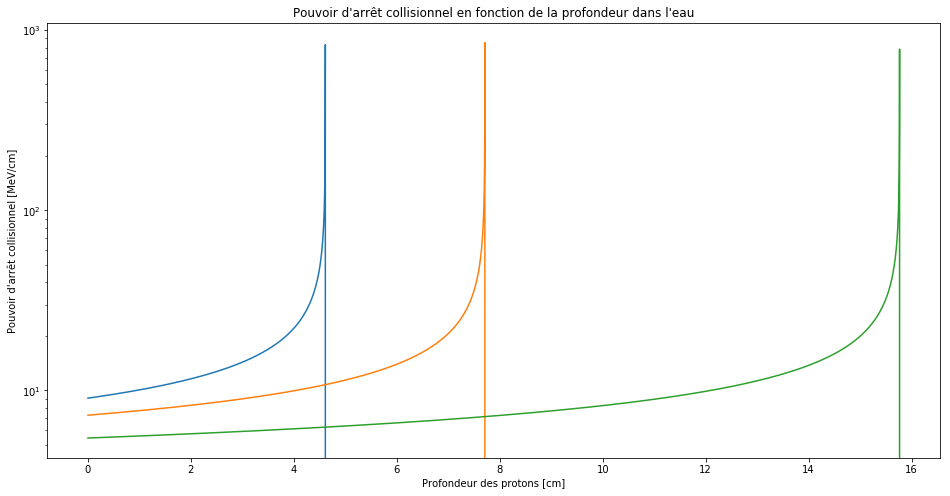

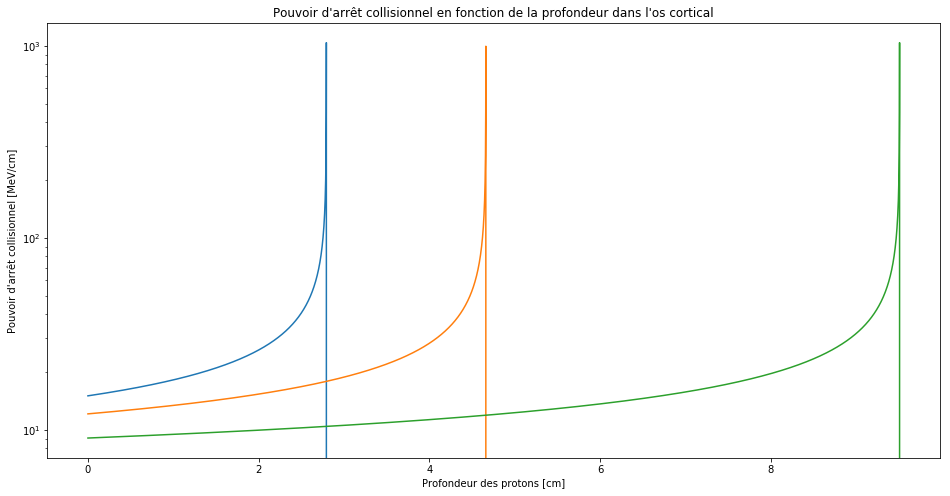

In [30]:
S_col_eau = lambda x: S_col(x, I_eau, ne_eau) # On a besoin de S_col et non R_CSDA, donc on doit redéfinir deux fonctions lambda
S_col_os = lambda x: S_col(x, I_os, ne_os)

def plot_bragg_eau(energie): # Cette fonction calcule les valeurs nécessaire pour créer les courbes pour les pics de Bragg
    energie_finale = np.linspace(0, energie, 1000)
    f = lambda x: integrate.quad(R_eau, x, energie)[0]
    s = list(map(f, energie_finale))
    energie_deposee = list(map(S_col_eau, energie_finale))
    return s, energie_deposee


plt.figure(figsize=(16,8))
plt.plot(plot_bragg_eau(75)[0], plot_bragg_eau(75)[1])
plt.plot(plot_bragg_eau(100)[0], plot_bragg_eau(100)[1])
plt.plot(plot_bragg_eau(150)[0], plot_bragg_eau(150)[1])
plt.xlabel("Profondeur des protons [cm]")
plt.ylabel("Pouvoir d'arrêt collisionnel [MeV/cm]")
plt.title("Pouvoir d'arrêt collisionnel en fonction de la profondeur dans l'eau")
plt.yscale("log")
plt.show()

def plot_bragg_os(energie):
    energie_finale = np.linspace(0, energie, 1000)
    f = lambda x: integrate.quad(R_os, x, energie)[0]
    s = list(map(f, energie_finale))
    energie_deposee = list(map(S_col_os, energie_finale))
    return s, energie_deposee


plt.figure(figsize=(16,8))
plt.plot(plot_bragg_os(75)[0], plot_bragg_os(75)[1])
plt.plot(plot_bragg_os(100)[0], plot_bragg_os(100)[1])
plt.plot(plot_bragg_os(150)[0], plot_bragg_os(150)[1])
plt.xlabel("Profondeur des protons [cm]")
plt.ylabel("Pouvoir d'arrêt collisionnel [MeV/cm]")
plt.title("Pouvoir d'arrêt collisionnel en fonction de la profondeur dans l'os cortical")
plt.yscale("log")
plt.show()

On remarque facilement que les pics de Bragg pour le proton de 100 MeV correspondent très bien aux résultats du numéro 6. C'est à dire autour de 7,7 et 4,6 cm pour l'eau et l'os respectivement.

La valeur où l'énergie est nulle représente le point où le proton s'arrête puisqu'il y a perdu toute sa vitesse, et ainsi son énergie cinétique. Ce point est représenté par le comportement asymptotique que l'on peut remarquer assez facilement.

## Question 14

On peut voir, avec les graphiques du numéro précédent, que les protons utilisés en protonthérapie déposent la plus grande partie de leur énergie cinétique lorsque leur vitesse atteint 0 et donc au maximum de leur portée calculée avec l'approximation $R_{CSDA}$. L'avantage de la protonthérapie est donc de pouvoir calculer la portée facilement à l'aide de méthodes numériques et puis libérer la presque totalité de l'énergie des protons dans la zone à traiter.